In [132]:
if(! require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse, srvyr, janitor, stringr, readxl)

In [133]:
delitos <- read_excel('D:/Escritorio/VSC/Estatal_victimas_15_25.xlsx') %>%
clean_names()

In [134]:
head(delitos)

ano,clave_ent,entidad,bien_juridico_afectado,tipo_de_delito,subtipo_de_delito,modalidad,sexo,rango_de_edad,enero,⋯,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Mujer,Menores de edad (0-17),0,⋯,0,0,0,0,0,0,0,0,0,0
2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Mujer,Menores de edad (0-17),0,⋯,0,0,0,0,0,0,0,0,0,0
2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Mujer,Menores de edad (0-17),0,⋯,0,0,1,0,0,1,0,0,0,0
2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Mujer,Menores de edad (0-17),0,⋯,0,0,0,0,0,0,0,0,0,0
2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Mujer,Menores de edad (0-17),0,⋯,0,0,0,0,0,0,0,0,0,0
2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma blanca,Mujer,Menores de edad (0-17),0,⋯,0,0,0,0,0,0,0,0,0,0


In [147]:
meses <- c('enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 
           'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre')

In [159]:
feminicidios_cdmx <- delitos %>%
  filter( 
         clave_ent == 9, 
         tipo_de_delito == 'Feminicidio')%>%
         rowwise() %>%
  mutate(total_fila = sum(c_across(meses), na.rm = TRUE))%>%
group_by(ano) %>%  
  summarise(victimas = sum(total_fila, na.rm = TRUE))%>%
mutate(dias_en_ano = if_else(leap_year(ano), 366, 365),  # Verifica si es bisiesto
         prom_diario = victimas / dias_en_ano)%>%
       select(ano, victimas, prom_diario)%>%
       filter(ano<2025)
feminicidios_cdmx

ano,victimas,prom_diario
<dbl>,<dbl>,<dbl>
2015,59,0.1616438
2016,47,0.1284153
2017,39,0.1068493
2018,47,0.1287671
2019,72,0.1972603
2020,82,0.2240437
2021,72,0.1972603
2022,76,0.2082192
2023,61,0.1671233


`geom_smooth()` using formula = 'y ~ x'


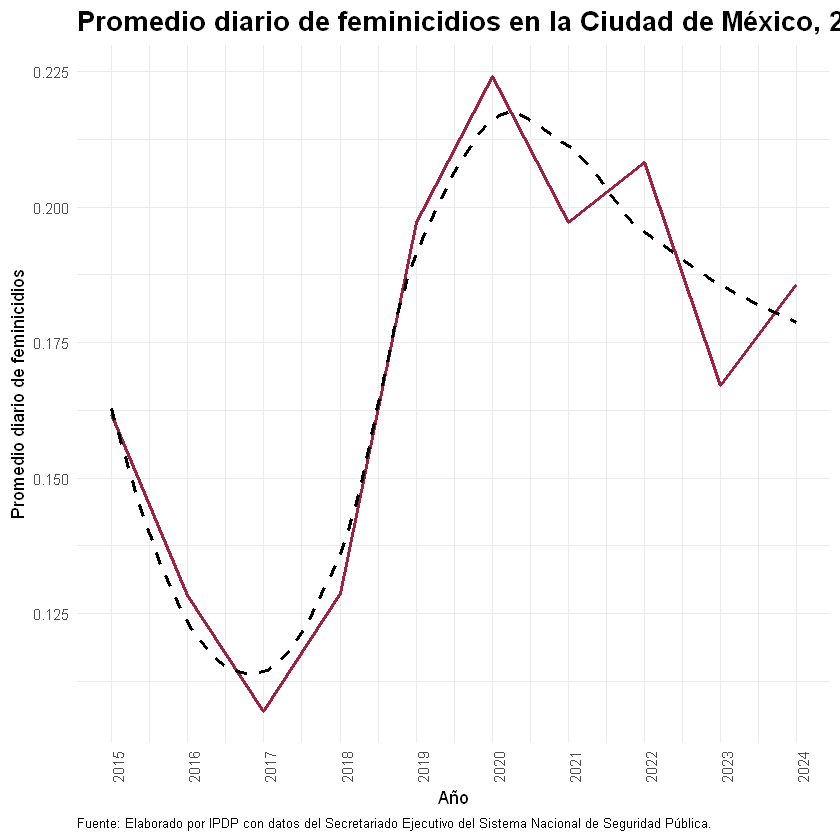

In [ ]:
ggplot(data = feminicidios_cdmx, aes(x = ano)) +
  geom_line(aes(y = prom_diario), color = "#9F2241", size = 1) +  
  #geom_point(aes(y = total_casos), color = "#909090", size = 3) +
  labs(title = 'Promedio diario de feminicidios en la Ciudad de México, 2015-2024',
       x = 'Año',
       y = 'Promedio diario de feminicidios',
       caption="Fuente: Elaborado por IPDP con datos del Secretariado Ejecutivo del Sistema Nacional de Seguridad Pública."
       ) +
       geom_smooth(aes(y = prom_diario), method = 'loess', se = FALSE, color = "black",linetype="dashed") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1),
  plot.title = element_text(hjust = 0, size = 16, face = 'bold'),
  plot.caption = element_text(hjust = 0, size = 8),
  
  ) +
  scale_x_continuous(breaks = seq(2015, 2024, 1)) 

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


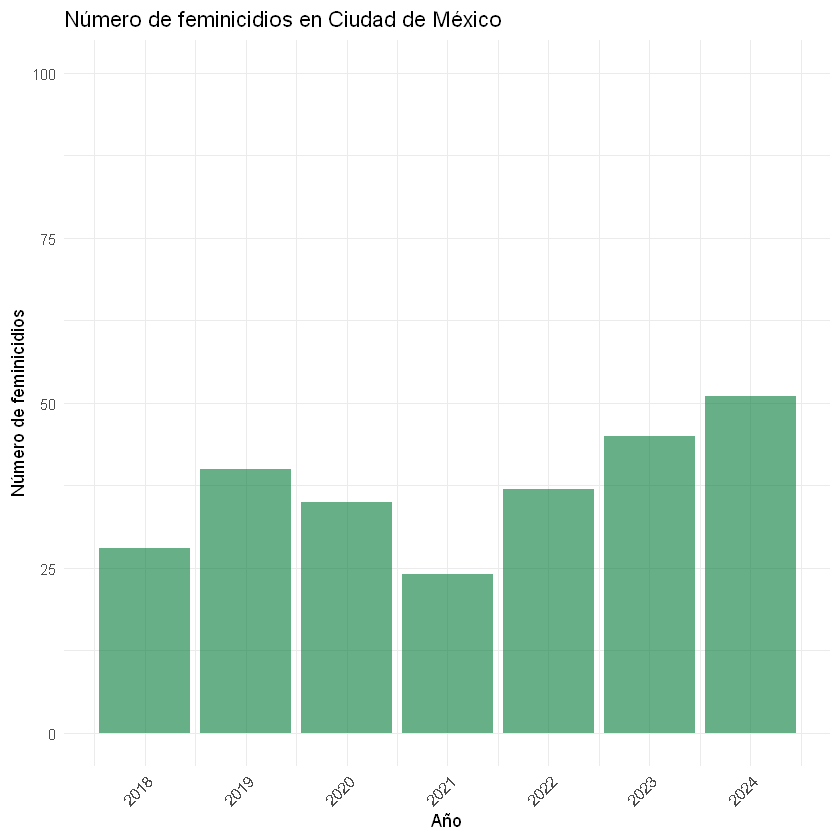

In [140]:
ggplot(data = feminicidios_cdmx, aes(x = ano)) +
  geom_bar(aes(y = total_casos), stat = "identity", fill = "#027a35", alpha = 0.6) +
  labs(title = 'Número de feminicidios en Ciudad de México',
       x = 'Año',
       y = 'Número de feminicidios') +
  scale_y_continuous(
    name = "Número de feminicidios",
    sec.axis = sec_axis(~ . / 100)
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_x_continuous(breaks = seq(2018, 2024, 1)) +
  scale_y_continuous(limits = c(0, 100))